In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import matplotlib.ticker as mtick
IMG_PATH = 'C:\\Users\\student\\Documents\\Bryant\\4_Senior\\MATH 490 - Capstone\\Presentation\\'

In [2]:
# Play a been when the champion model is beat
CHAMPION_SCORE = 0
import winsound
def chicken_dinner():
    winsound.Beep(2500, 50)

Import dataset

In [3]:
dtype = {'admtype': 'int8',
 'age': 'float16',
 'asource': 'category',
 'campus': 'category',
 'diag_adm': 'category',
 'diag_cat3': 'category',
 'diag_cat4': 'category',
 'er_mode': 'int8',
 'moa': 'int8',
 'pay_ub92': 'int8',
 'provider': 'int8',
 'pt_state': 'category',
 'race': 'int8',
 'sex': 'int8',
 'tot': 'float64',
 'yoa': 'int8'}

In [4]:
#df0 = pd.read_csv('df_sample_cleansed2.csv', dtype=dtype, low_memory=False)
df0_full = pd.read_csv('df_cleansed2.csv', dtype=dtype, low_memory=False)
#df3 = pd.read_csv('df_sample_coded.csv', low_memory=False)
#df3 = pd.read_csv('df_binary.csv', low_memory=False)
#df3 = pd.read_csv('df3_arrival.csv', low_memory=False)

In [5]:
df0_full.head()

,pay_ub92,age,sex,provider,moa,yoa,admtype,asource,tot,pt_state,diag_adm,campus,er_mode,race,diag_cat3,diag_cat4
0,6,87.0,2,10,2,5,1,7,3412.0,RI,486,0,0,1,486,486
1,6,38.0,1,10,2,5,1,7,4132.0,RI,5128,0,0,1,512,5128
2,6,22.0,2,10,2,5,1,9,12583.0,RI,29650,0,0,1,296,2965
3,6,45.0,2,10,1,5,1,7,17462.0,RI,7850,0,0,1,785,7850
4,6,26.0,2,10,1,5,2,1,10357.0,RI,650,0,0,9,650,650


In [6]:
df0_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972363 entries, 0 to 972362
Data columns (total 16 columns):
pay_ub92     972363 non-null int8
age          972363 non-null float16
sex          972363 non-null int8
provider     972363 non-null int8
moa          972363 non-null int8
yoa          972363 non-null int8
admtype      972363 non-null int8
asource      972363 non-null category
tot          972363 non-null float64
pt_state     972363 non-null category
diag_adm     972363 non-null category
campus       972363 non-null category
er_mode      972363 non-null int8
race         972363 non-null int8
diag_cat3    972363 non-null category
diag_cat4    972363 non-null category
dtypes: category(6), float16(1), float64(1), int8(8)
memory usage: 25.5 MB


## Transform Data

In [7]:
df1 = df0_full.copy()

In [8]:
#months = pd.DataFrame(columns=['winter', 'spring', 'summer', 'fall'], index=df0.index)

In [9]:
#months.winter = df0.moa.isin([12, 1, 2])
#months.spring = df0.moa.isin([3, 4, 5])
#months.summer = df0.moa.isin([6, 7, 8])
#months.fall = df0.moa.isin([9, 10, 11])

In [10]:
seasons = {12: 'winter', 1: 'winter', 2: 'winter',
           3: 'spring', 4: 'spring', 5: 'spring',
           6: 'summer', 7: 'summer', 8: 'summer',
           9: 'fall', 10: 'fall', 11: 'fall'}

In [11]:
df1['moa'] = df1['moa'].map(seasons).astype('category')

In [12]:
df1['moa'].head()

0    winter
1    winter
2    winter
3    winter
4    winter
Name: moa, dtype: category
Categories (4, object): [fall, spring, summer, winter]

## Split data set into Train and Test

In [13]:
train_index = pd.read_csv("Train_Index.csv")
test_index = pd.read_csv("Test_Index.csv")

In [14]:
train0 = df1.loc[train_index['0']]

In [15]:
test0 = df1.loc[test_index['0']]

In [16]:
#X_train = train.drop(columns=['tot'])
#X_test = test.drop(columns=['tot'])
#y_train = train.tot.astype(float)
#y_test = test.tot.astype(float)

In [17]:
#X_train.shape

In [18]:
#X_test.shape

In [19]:
train0.shape

(968362, 16)

## Impute and Transform Values

In [20]:
def simplify_state(df):
    """Group states"""
    state_codes = ['RI', 'MA', 'NY', 'FL', '9']
    df.pt_state = df.pt_state.cat.set_categories(state_codes)
    df.pt_state = df.pt_state.fillna('9')
    return df

In [21]:
def simplify_age(df):
    """Reduce ages over 100 to 100"""
    df.age = df.age.where(df.age < 100, other=100)
    return df

In [22]:
def simplify_moa(df):
    """Group month of arrival to seasons"""
    seasons = {12: 'winter', 1: 'winter', 2: 'winter',
           3: 'spring', 4: 'spring', 5: 'spring',
           6: 'summer', 7: 'summer', 8: 'summer',
           9: 'fall', 10: 'fall', 11: 'fall'}
    return df

In [23]:
def drop_columns(df):
    """Drop unnessary columns"""
    columns = ['diag_cat4']
    df = df.drop(columns, axis="columns")
    return df

In [24]:
def transform_features(df):
    """Execute transformations"""
    df = simplify_state(df)
    df = simplify_age(df)
    df = simplify_moa(df)
    df = drop_columns(df)
    #df = transform_target(df)
    return df

In [25]:
train = transform_features(train0)

In [26]:
train = transform_features(test0)

In [31]:
train.shape

(4000, 15)

## Balance Sample

Sampling parameters

In [27]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]

In [35]:
size = [10000] * 6

Graph

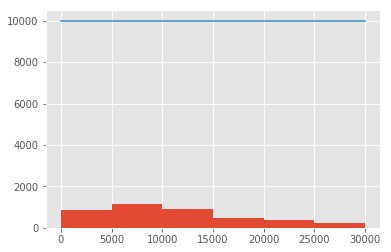

In [36]:
train['tot'].hist(bins=bins)
x = np.linspace(0, 30000, 2)
plt.gca().plot(x, [size[0]]*len(x))

In [ ]:
#s1 = np.random.choice(train[(train['tot'] > 0) & (train['tot'] <= 10000)].index, size=size[0], replace=False)
#s2 = np.random.choice(train[(train['tot'] > 10000) & (train['tot'] <= 20000)].index, size=size[1], replace=False)
#s3 = np.random.choice(train[(train['tot'] > 20000) & (train['tot'] <= 30000)].index, size=size[2], replace=True)
#s = np.concatenate((s1, s2, s3))
#s
#len(s)

In [ ]:
s = np.array([])
for i in range(len(bins) - 1):
    d = train[(train['tot'] > bins[i]) & (train['tot'] <= bins[i+1])]
    sb = np.random.choice(d.index, size=size[i], replace=size[i] > len(d))
    s = np.concatenate((s, sb))
    print(len(s))

In [ ]:
train_balanced = train.loc[s]

In [ ]:
train_balanced['tot'].hist(bins=bins)
x = np.linspace(0, 30000, 2)
plt.gca().plot(x, [size[0]]*len(x))

In [ ]:
## Sub sample for laptop

In [ ]:
train_balanced2 = train_balanced.copy(deep=True)

In [ ]:
train_balanced2.index = range(len(train_balanced2))

i = np.random.choice(train_balanced2.index, size=16000, replace=False)
train_balanced_sample = train_balanced2.loc[i]

In [ ]:
# verify it is balanced
train_balanced_sample['tot'].hist(bins=bins)
x = np.linspace(0, 30000, 2)
#plt.gca().plot(x, [300000]*len(x))

In [ ]:
X_train = train_balanced_sample.drop(columns=['tot'])
X_test = test.drop(columns=['tot'])
y_train = train_balanced_sample.tot.astype(float)
y_test = test.tot.astype(float)

In [ ]:
X_train.shape

In [ ]:
X_train.columns

## Model Testing

In [ ]:
from catboost import Pool, CatBoostRegressor

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# initialize Pool
cat_features = [0, 2, 3, 4, 6, 7]
cat_features.extend(range(8, len(X_train.columns)))
print(cat_features)
print(X_train.columns[cat_features])

In [ ]:
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, cat_features=cat_features) 

In [ ]:
# specify the training parameters 
#model = CatBoostRegressor(iterations=2, depth=2, learning_rate=1, loss_function='RMSE')
model = CatBoostRegressor(iterations=10, loss_function='RMSE')
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
predicted = model.predict(test_pool)
#print(preds)

In [ ]:
## Make this a function
fi = model.get_feature_importance()
for i in range(len(X_train.columns)):
    print(X_train.columns[i], '\t', fi[i])

In [ ]:
# Play a been when the champion model is beat
CHAMPION_SCORE = 0
import winsound
def chicken_dinner():
    winsound.Beep(2500, 50)

In [ ]:
def get_champion_score(score):
    global CHAMPION_SCORE
    if score > CHAMPION_SCORE:
        chicken_dinner()
        CHAMPION_SCORE = score
        print("New champion score!", score)
    else:
        print("Score to beat", CHAMPION_SCORE)

In [ ]:
def score_model(train_predicted, test_predicted, y_train, y_test):
    rmse_train = mean_squared_error(y_train, train_predicted)**.5
    rmse_test = mean_squared_error(y_test, test_predicted)**.5
    r2_train = r2_score(y_train, train_predicted)
    r2_test = r2_score(y_test, test_predicted)
    print("Train RMSE:\t{}".format(rmse_train))
    print("Test RMSE:\t{}".format(rmse_test))
    print("Train r2:\t{}".format(r2_train))
    print("Test r2:\t{}".format(r2_test))
    get_champion_score(r2_test)
    return r2_test

In [ ]:
def fit_model(params, cat_features=cat_features, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    train_pool = Pool(X_train, y_train, cat_features=cat_features)
    test_pool = Pool(X_test, cat_features=cat_features)
    model = CatBoostRegressor(**params)
    
    #train the model
    model.fit(train_pool)
    
    # make the prediction using the resulting model
    train_predicted = model.predict(train_pool)
    test_predicted = model.predict(test_pool)
    
    metric = score_model(train_predicted, test_predicted, y_train, y_test)
    
    return model, metric

In [ ]:
models = {}

In [ ]:
data_set_name = '6 bins/ s=10000'

In [ ]:
m, s = fit_model({'iterations': 100})
model_name = '{} 100 iter'.format(data_set_name)
models[model_name] = m, s

In [ ]:
m, s = fit_model({'iterations': 100, 'depth': 2})
model_name = '{} 100 iter 2 depth'.format(data_set_name)
models[model_name] = m, s

In [ ]:
m, s = fit_model({'iterations': 1000})
model_name = '{} 1000 iter'.format(data_set_name)
models[model_name] = m, s

In [ ]:
m, s = fit_model({'iterations': 1000, 'bootstrap_type': 'No'})
model_name = '{} 1000 iter'.format(data_set_name)
models[model_name] = m, s

In [ ]:
m, s = fit_model({'iterations': 500, 'bootstrap_type': 'No'})
model_name = '{} 500 iter, bootstrap=No'.format(data_set_name)
models[model_name] = m, s

## Residual Plot

In [ ]:
def res_plot(model, y_test):
    test_predicted = models[model][0].predict(test_pool)
    
    df_residuals = pd.DataFrame(columns=['predicted', 'actual'])
    df_residuals['predicted'] = test_predicted
    df_residuals['actual'] = y_test.reset_index()['tot']

    fig, ax = plt.subplots()

    # plot residual heat map
    df_residuals.plot(kind='hexbin', x='predicted', y='actual', gridsize=15, sharex=False, xlim=(0,30000), ax=ax)

    # now plot the identiy line
    ax.plot([0, 30000], [0, 30000], 'k-', alpha=.75)

    # format
    ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
    ax.set_title("Residual Plot")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.grid(None)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    #fig.savefig(IMG_PATH + 'Residual.png', dpi=300)
    
    g = sns.jointplot("predicted", "actual", data=df_residuals, kind="reg",
                  xlim=(0, 30000), ylim=(0, 30000), color="m", height=7)

In [ ]:
pprint(models)

In [ ]:
res_plot('6 bins/ s=10000 100 iter', y_test)

In [ ]:
res_plot('6 bins/ s=10000 1000 iter', y_test)